# Testing a Child's IQ

By the end of this project we will find out if a child's IQ depends on their mother's education or not.

In [1]:
# Loading the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Loading the data set and also displaying a sample of the data.
df=pd.read_csv('child_iq.csv')
df.head()

,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26


In [3]:
df.columns

Index(['Unnamed: 0', 'ppvt', 'educ_cat', 'momage'], dtype='object')

In [4]:
# Removing unwated columns.
df=df[[#'Unnamed: 0',\
   'ppvt', 'educ_cat', 'momage']]

In [5]:
df.shape # checking the shape of our data

(400, 3)

In [6]:
df.isna().sum() # checking for the total sum of missing values

ppvt        0
educ_cat    0
momage      0
dtype: int64

In [7]:
df.loc[df.duplicated()].head(4) # checking for duplicated values

,ppvt,educ_cat,momage
36,85,2,21
55,104,2,23
61,86,2,19
72,108,2,22


In [8]:
summary=df.describe()
summary                  # a summary of the data

,ppvt,educ_cat,momage
count,400.000000,400.000000,400.000000
mean,86.932500,2.112500,22.790000
std,20.440094,0.813325,2.689607
min,20.000000,1.000000,17.000000
25%,74.000000,2.000000,21.000000
50%,90.000000,2.000000,23.000000
75%,102.000000,3.000000,25.000000
max,144.000000,4.000000,29.000000


In [9]:
df=df.rename(columns={'ppvt':'Test','educ_cat':'Edu','momage':'Momage'})
df.head(0)                                                                 # renaming columns

,Test,Edu,Momage


## EDA

### Univariate Analysis 

<Axes: title={'center': 'Test visualisation'}, xlabel='Sample of test scores', ylabel='Counts'>

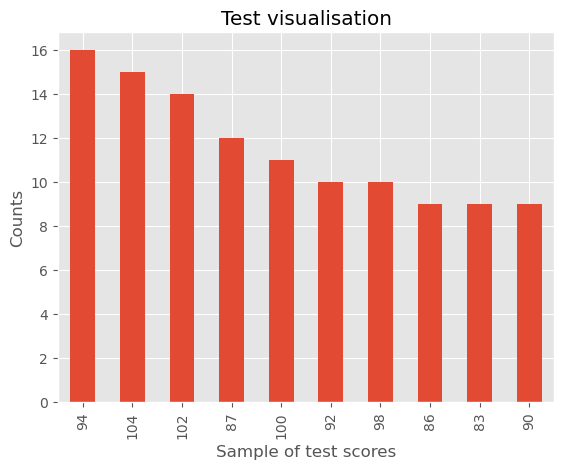

In [10]:
# The distribution of the test scores.
dfv1 = df['Test'].value_counts().head(10)\
    .plot(kind='bar',title='Test visualisation')
dfv1.set_xlabel('Sample of test scores')                                 
dfv1.set_ylabel('Counts')
dfv1

Axes(0.125,0.11;0.775x0.77)


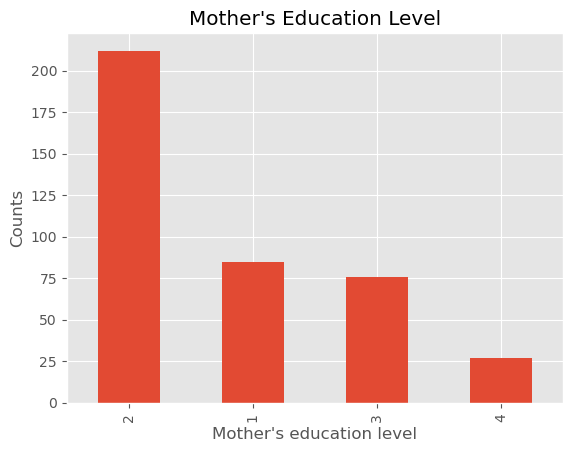

In [12]:
# Distribution of the ages mother's education level
dfv2=df['Edu'].value_counts().head(10)\
    .plot(kind='bar',title="Mother's Education Level")
dfv2.set_xlabel("Mother's education level")
dfv2.set_ylabel('Counts')

print(dfv2)

Text(0, 0.5, 'Counts')

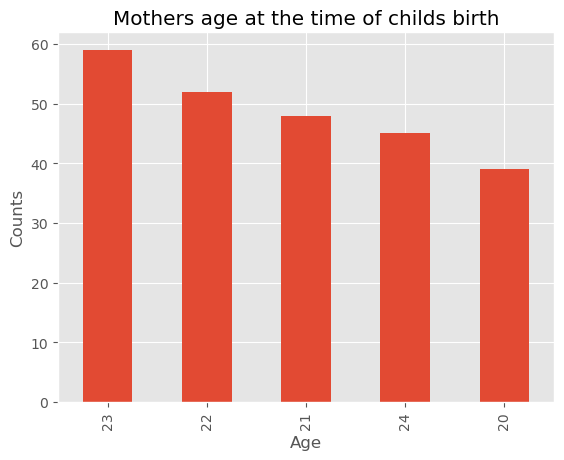

In [13]:
dfv3=df['Momage'].value_counts().head(5)\
    .plot(kind='bar',title='Mothers age at the time of childs birth')
dfv3.set_xlabel('Age')
dfv3.set_ylabel('Counts')

## Multivariate Analysis 

In [14]:
df[['Test','Edu','Momage']].value_counts().head(5) # comparing test score, mother's education and age

Test  Edu  Momage
104   2    23        5
102   2    24        3
94    2    23        3
98    2    25        3
85    2    21        2
Name: count, dtype: int64

<Axes: xlabel='Edu', ylabel='Momage'>

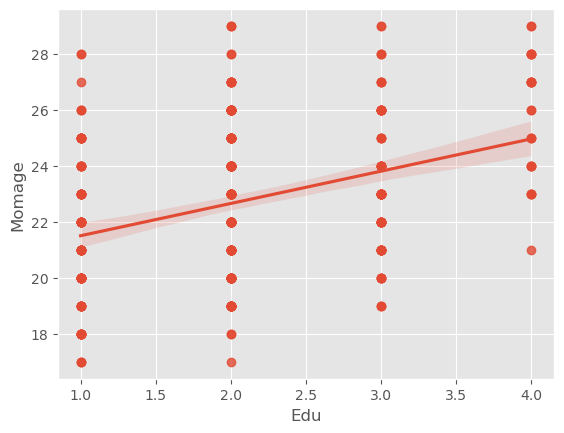

In [15]:
# Comparing mother's age vs education 
sns.regplot(data=df,x='Edu',y='Momage')

<Axes: xlabel='Edu', ylabel='Test'>

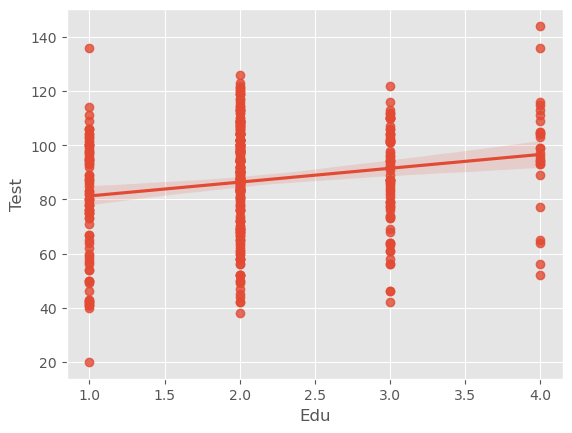

In [16]:
sns.regplot(data=df,x='Edu',y='Test') # comparing mother's education vs test score.

<Axes: xlabel='Momage', ylabel='Test'>

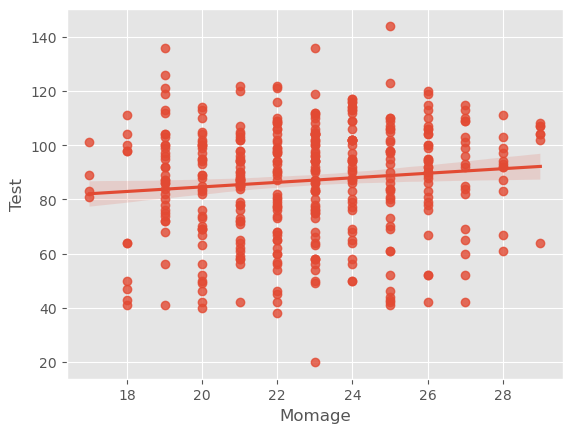

In [17]:
sns.regplot(data=df,x='Momage',y='Test') # mother's age vs test score

In [18]:
#correlations
df.corr()

,Test,Edu,Momage
Test,1.000000,0.203227,0.110567
Edu,0.203227,1.000000,0.348811
Momage,0.110567,0.348811,1.000000


<Axes: >

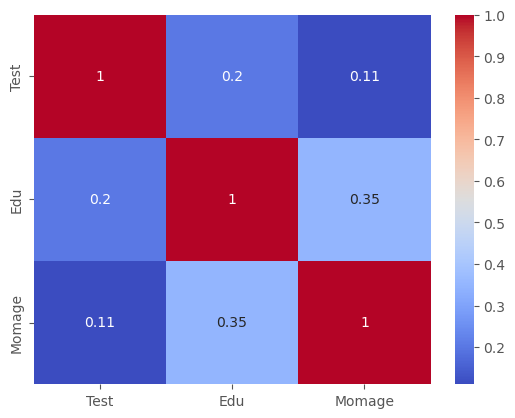

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

The diagram above is called a heat map, it shows the strength of relationships between two variables.
The standard for a good relatioinship is 0.5, anything below that would be considered a weak realtionship.
We can see how independent these variables are from each other, that means they have very little impact on eachanother.

#  So the big question, does a mother's education level or inteligence affect her child's?

Let's look at the education levels of mothers
mother education (1 = no HighSchool education, 2 = HighSchool grad, 3 = some college, 4 = college grad)

<Axes: title={'center': '1 = no HighSchool education, 2 = HighSchool grad, 3 = some college, 4 = college grad'}, ylabel='count'>

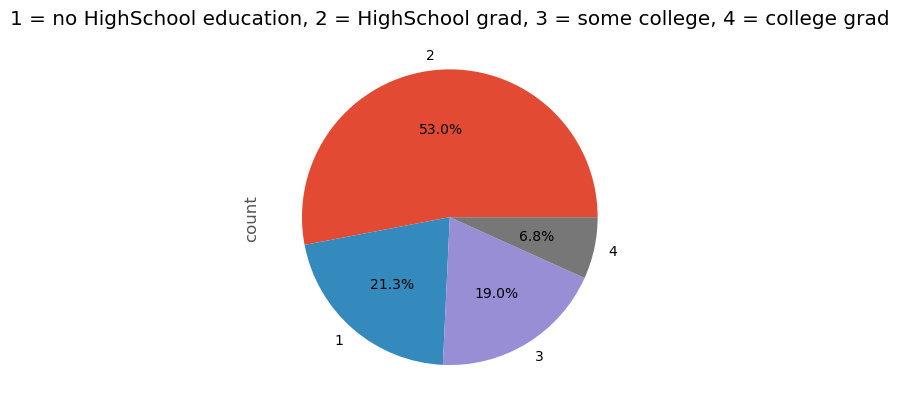

In [20]:
df['Edu'].value_counts().plot(kind='pie',\
        title='1 = no HighSchool education, 2 = HighSchool grad, 3 = some college, 4 = college grad'\
        ,autopct='%1.1f%%')

In [21]:
pair= df[df['Edu']<=4].head(20)
pair.head()

,Test,Edu,Momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26


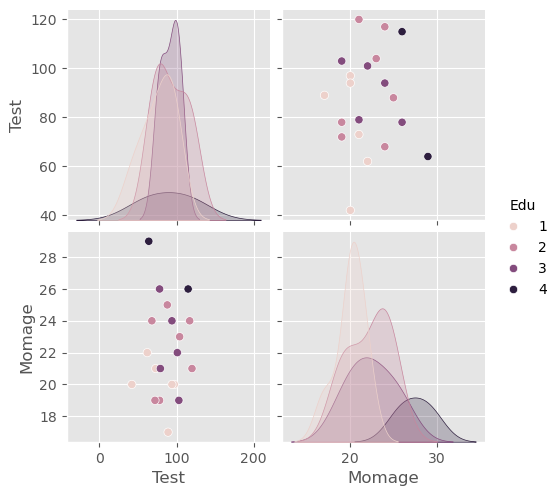

In [22]:
sns.pairplot(data=pair,hue='Edu')

### According to the data available, intelligence is not inherited by genes, reasons bellow:
### If you look at the child with the highest IQ test score, their mother's level of education is at 2.

# Conclusion
###  A highly educated and responsible mother has the advantage of giving her child a good educational foundation just from her level of knowledge.
###   The bottom line is that every child, if given a good educational opportunity will do excellent.